In [20]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import os
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk


In [21]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
# Loading the dataset
file_path = "AAAI_Dataset.xlsx"
data = pd.read_excel(file_path)

In [23]:
# Displaying the first few rows to understand the structure
print(data.head())

   id                                              tweet label
0   1  Chinese converting to Islam after realising th...  fake
1   2  11 out of 13 people (from the Diamond Princess...  fake
2   3  COVID-19 Is Caused By A Bacterium, Not Virus A...  fake
3   4  Mike Pence in RNC speech praises Donald Trump’...  fake
4   5  6/10 Sky's @EdConwaySky explains the latest #C...  real


In [25]:
# Preprocessing the tweets: cleaning and tokenisation
def preprocess_tweet(tweet):
    stop_words = set(stopwords.words("english"))
    tweet = tweet.lower()  # Convert to lowercase
    tweet = re.sub(r"http\S+", "", tweet)  # Remove URLs
    tweet = re.sub(r"[^a-z\s]", "", tweet)  # Remove non-alphabetical characters
    tweet = tweet.split()  # Tokenize by splitting on whitespace
    tweet = [word for word in tweet if word not in stop_words]  # Remove stopwords
    return tweet

In [31]:
# Applying preprocessing to all tweets
data['cleaned_tweet'] = data['tweet'].apply(preprocess_tweet)

In [32]:
# Separating the tweets into real and fake
real_tweets = data[data['label'] == 'real']['cleaned_tweet']
fake_tweets = data[data['label'] == 'fake']['cleaned_tweet']

In [33]:
# Flattening the lists of words
real_words = [word for tweet in real_tweets for word in tweet]
fake_words = [word for tweet in fake_tweets for word in tweet]

In [34]:
# Frequency analysis
real_word_counts = Counter(real_words)
fake_word_counts = Counter(fake_words)

In [35]:
# Converting to DataFrame for visualisation
real_word_df = pd.DataFrame(real_word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False).head(20)
fake_word_df = pd.DataFrame(fake_word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False).head(20)


In [36]:
# Displaying the top keywords
print("\nTop 20 keywords in real tweets:")
print(real_word_df)



Top 20 keywords in real tweets:
                  word  count
4                covid    788
133              cases    503
102                new    283
126              tests    217
120              total    190
75              deaths    181
152             states    179
349             number    173
236           reported    158
182          confirmed    153
82             testing    144
60              people    143
41                 amp    133
9          coronavirus    126
510              today    120
29   indiafightscorona    116
164                day     99
129             report     93
144             health     88
5                 data     86


In [37]:
print("\nTop 20 keywords in fake tweets:")
print(fake_word_df)


Top 20 keywords in fake tweets:
            word  count
24         covid    432
6    coronavirus    392
27         virus     84
9         people     80
78           new     76
275      vaccine     65
69          says     62
79         cases     62
202        trump     62
579     pandemic     60
181        video     58
72         india     58
343       corona     57
174     hospital     57
274     lockdown     50
371        china     50
44          news     48
358     patients     47
137         cure     46
182        shows     45


In [42]:
# Generating word clouds
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(real_words))
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(fake_words))


(-0.5, 799.5, 399.5, -0.5)

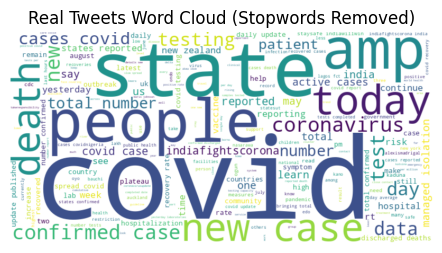

In [43]:
# Visualise the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title("Real Tweets Word Cloud (Stopwords Removed)")
plt.axis("off")

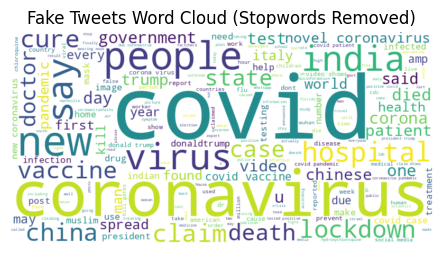

In [45]:
# Fake word cloud visualisation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title("Fake Tweets Word Cloud (Stopwords Removed)")
plt.axis("off")

plt.show()

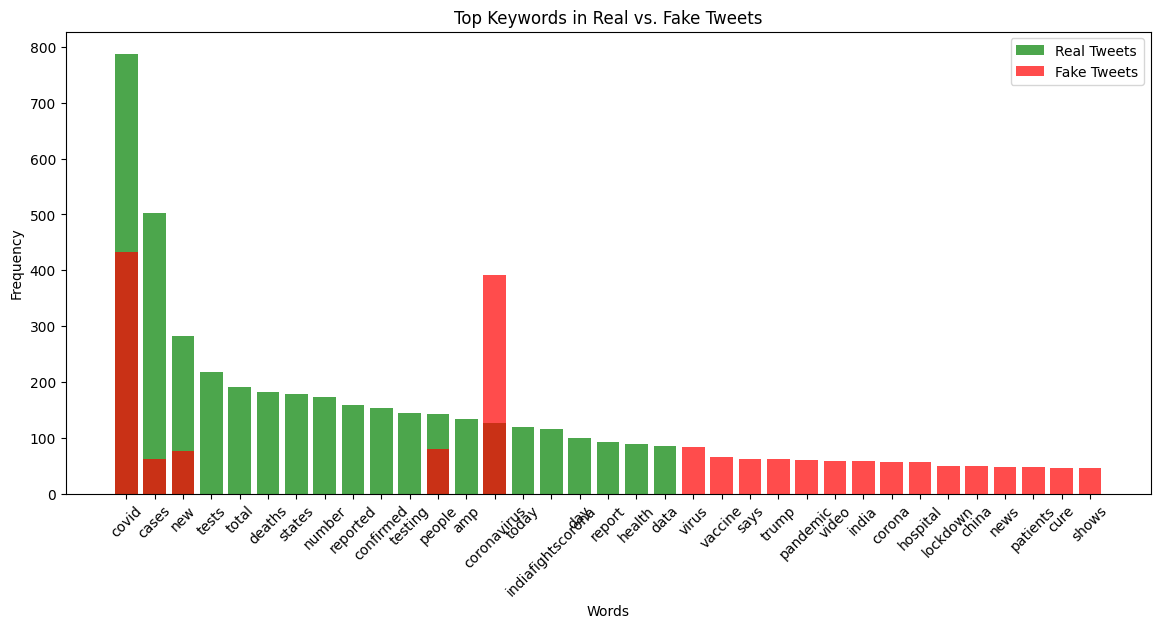

In [47]:
# Plotting bar charts for real and fake tweets
plt.figure(figsize=(14, 6))

# Real tweets
plt.bar(real_word_df['word'], real_word_df['count'], alpha=0.7, label='Real Tweets', color='green')

# Fake tweets
plt.bar(fake_word_df['word'], fake_word_df['count'], alpha=0.7, label='Fake Tweets', color='red')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Keywords in Real vs. Fake Tweets')
plt.xticks(rotation=45)
plt.legend()
plt.show()


CONCLUSIONS

Common Keywords Between Real and Fake Tweets:

    Keywords like "covid", "coronavirus", "cases", and "people" appear in both real and fake tweets, indicating shared vocabulary around the pandemic.
    This suggests that misinformation often piggybacks on commonly discussed topics to appear credible.

Keywords Unique to Fake Tweets:

    Words like "vaccine", "virus", "trump", "pandemic", "china", "cure", and "shows" are disproportionately frequent in fake tweets.
    This reflects a focus on controversial or sensational topics often used to attract attention and spread misinformation.

Keywords Unique to Real Tweets:

    Words like "tests", "total", "deaths", "states", "reported", and "confirmed" are prevalent in real tweets.
    These are more factual and data-driven terms, indicating information dissemination related to COVID-19 statistics and government updates.

Sensationalism in Fake Tweets:

    Fake tweets focus on emotionally charged topics like "vaccine", "trump", "china", and "cure", which may be used to provoke fear, curiosity, or controversy.

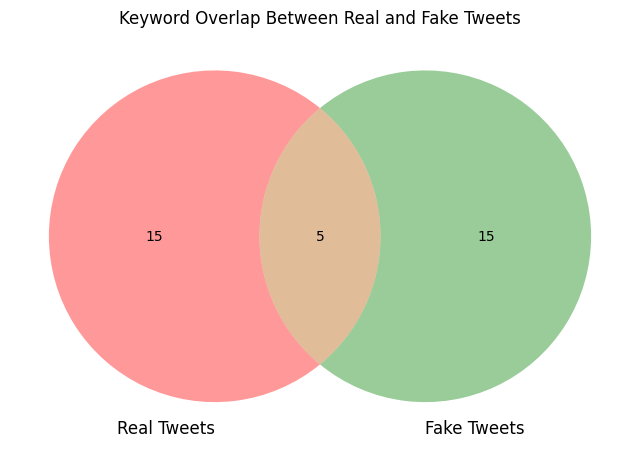

In [50]:
# Creating sets of top 20 words for real and fake tweets
real_top_words = set(real_word_df['word'])
fake_top_words = set(fake_word_df['word'])

# Find common keywords
common_keywords = real_top_words.intersection(fake_top_words)

# Venn diagram
plt.figure(figsize=(8, 6))
venn = venn2([real_top_words, fake_top_words], ('Real Tweets', 'Fake Tweets'))

# Annotating common keywords
plt.title("Keyword Overlap Between Real and Fake Tweets")
for word in common_keywords:
    print(f"Common keyword: {word}")

plt.show()

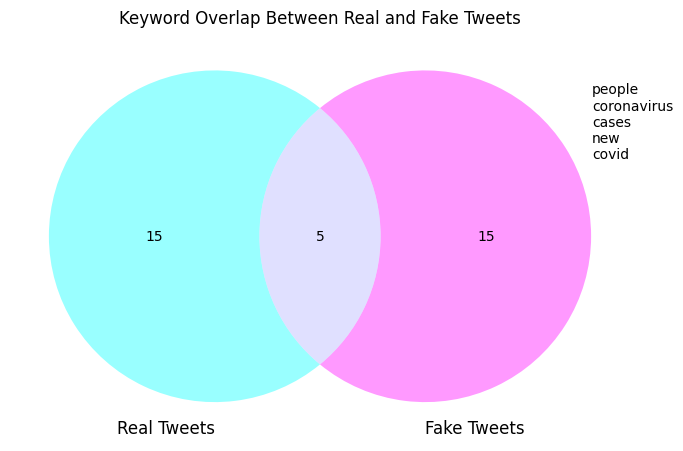

In [59]:
# Create sets of top 20 words for real and fake tweets
real_top_words = set(real_word_df['word'])
fake_top_words = set(fake_word_df['word'])

# Venn diagram with custom colours
plt.figure(figsize=(8, 6))
venn = venn2([real_top_words, fake_top_words],
             ('Real Tweets', 'Fake Tweets'),
             set_colors=('cyan', 'magenta'))  # Brighter colours

# Annotate the common keywords in the intersection
common_keywords = real_top_words.intersection(fake_top_words)
intersection_text = "\n".join(common_keywords)  # Join the common keywords into a single string

# Adjust position of the annotation to the right
plt.annotate(intersection_text,
             xy=(0.7, 0.2),  # Coordinates (adjust as needed)
             fontsize=10,
             color="black",
             ha="left")  # Align text to the left for better readability

plt.title("Keyword Overlap Between Real and Fake Tweets")
plt.show()
